In [80]:
## Importing the libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [81]:
## loading the data
# Imporing the necessary columns
data = pd.read_csv('project_itsm.csv',usecols=['Open_Time','Incident_ID'])

In [82]:
pd.set_option('display.max_columns',None)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Incident_ID  46606 non-null  object
 1   Open_Time    46606 non-null  object
dtypes: object(2)
memory usage: 728.3+ KB


In [84]:
#pd.set_option('display.max_rows',None)

In [85]:
data.head()

,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10-08-2012 11:01


In [86]:
data.Open_Time.value_counts()

24-03-2014 08:54    7
25-11-2013 10:52    6
07-02-2014 10:44    6
21-02-2014 15:01    6
27-01-2014 10:14    6
                   ..
04-02-2014 11:43    1
24-01-2014 10:13    1
06-12-2013 13:54    1
26-02-2014 13:08    1
30-12-2013 08:45    1
Name: Open_Time, Length: 34636, dtype: int64

In [87]:
data.isnull().sum()

Incident_ID    0
Open_Time      0
dtype: int64

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Incident_ID  46606 non-null  object
 1   Open_Time    46606 non-null  object
dtypes: object(2)
memory usage: 728.3+ KB


In [89]:
# Adding a new column which will have the number of tickets per day
data['No_of_Incidents'] = data.groupby('Open_Time')['Incident_ID'].transform('count')

In [90]:
data.head()

,Incident_ID,Open_Time,No_of_Incidents
0,IM0000004,05-02-2012 13:32,1
1,IM0000005,12-03-2012 15:44,1
2,IM0000006,29-03-2012 12:36,1
3,IM0000011,17-07-2012 11:49,1
4,IM0000012,10-08-2012 11:01,1


In [91]:
# Coverting all the values in proper Datetime format
data['Open_Time'] = pd.to_datetime(data['Open_Time']).dt.date

In [92]:
data['Open_Time']= pd.to_datetime(data['Open_Time'], infer_datetime_format=True)


In [93]:
data.head()

,Incident_ID,Open_Time,No_of_Incidents
0,IM0000004,2012-05-02,1
1,IM0000005,2012-12-03,1
2,IM0000006,2012-03-29,1
3,IM0000011,2012-07-17,1
4,IM0000012,2012-10-08,1


In [94]:
data.shape

(46606, 3)

In [95]:
data.isnull().sum()

Incident_ID        0
Open_Time          0
No_of_Incidents    0
dtype: int64

In [96]:

data.Open_Time.value_counts()

2013-11-18    569
2014-01-27    500
2014-01-21    476
2014-03-02    466
2014-02-17    461
             ... 
2012-08-22      1
2013-01-22      1
2013-09-04      1
2012-07-17      1
2012-10-18      1
Name: Open_Time, Length: 331, dtype: int64

In [97]:
data.No_of_Incidents.value_counts()

1    25192
2    14734
3     5112
4     1228
5      285
6       48
7        7
Name: No_of_Incidents, dtype: int64

In [98]:
data.Incident_ID.value_counts()

IM0016184    1
IM0026548    1
IM0023270    1
IM0039826    1
IM0016124    1
            ..
IM0031492    1
IM0010446    1
IM0042246    1
IM0040057    1
IM0044763    1
Name: Incident_ID, Length: 46606, dtype: int64

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Incident_ID      46606 non-null  object        
 1   Open_Time        46606 non-null  datetime64[ns]
 2   No_of_Incidents  46606 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ MB


In [100]:
sum(data.duplicated(subset = 'Incident_ID')) == 0

True

In [101]:
data['Incident_ID'].duplicated().sum()

0

In [102]:
sum(data.duplicated(subset = 'Open_Time')) == 0

False

In [103]:
data['Open_Time'].duplicated().sum()

46275

In [104]:
data

,Incident_ID,Open_Time,No_of_Incidents
0,IM0000004,2012-05-02,1
1,IM0000005,2012-12-03,1
2,IM0000006,2012-03-29,1
3,IM0000011,2012-07-17,1
4,IM0000012,2012-10-08,1
...,...,...,...
46601,IM0047053,2014-03-31,1
46602,IM0047054,2014-03-31,1
46603,IM0047055,2014-03-31,1
46604,IM0047056,2014-03-31,1


In [105]:
data.drop(['Incident_ID'],axis=1,inplace=True)

In [106]:
data

,Open_Time,No_of_Incidents
0,2012-05-02,1
1,2012-12-03,1
2,2012-03-29,1
3,2012-07-17,1
4,2012-10-08,1
...,...,...
46601,2014-03-31,1
46602,2014-03-31,1
46603,2014-03-31,1
46604,2014-03-31,1


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Open_Time        46606 non-null  datetime64[ns]
 1   No_of_Incidents  46606 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 728.3 KB


In [108]:
# Setting Date as the Index
data2=data.set_index(['Open_Time'])

In [109]:
data2

,No_of_Incidents
Open_Time,
2012-05-02,1
2012-12-03,1
2012-03-29,1
2012-07-17,1
2012-10-08,1
...,...
2014-03-31,1
2014-03-31,1
2014-03-31,1


In [110]:
data2.shape

(46606, 1)

In [111]:
data3 = data2.groupby('Open_Time').aggregate(np.sum)

In [112]:
data3

,No_of_Incidents
Open_Time,
2012-01-10,1
2012-02-10,1
2012-03-09,1
2012-03-29,1
2012-05-02,1
...,...
2014-11-02,639
2014-11-03,534
2014-12-01,1


In [113]:
data3.shape

(331, 1)

In [114]:
data3.describe()

,No_of_Incidents
count,331.000000
mean,231.631420
std,299.219029
min,1.000000
25%,2.000000
50%,7.000000
75%,528.500000
max,1167.000000


In [115]:
import matplotlib.pyplot as plt

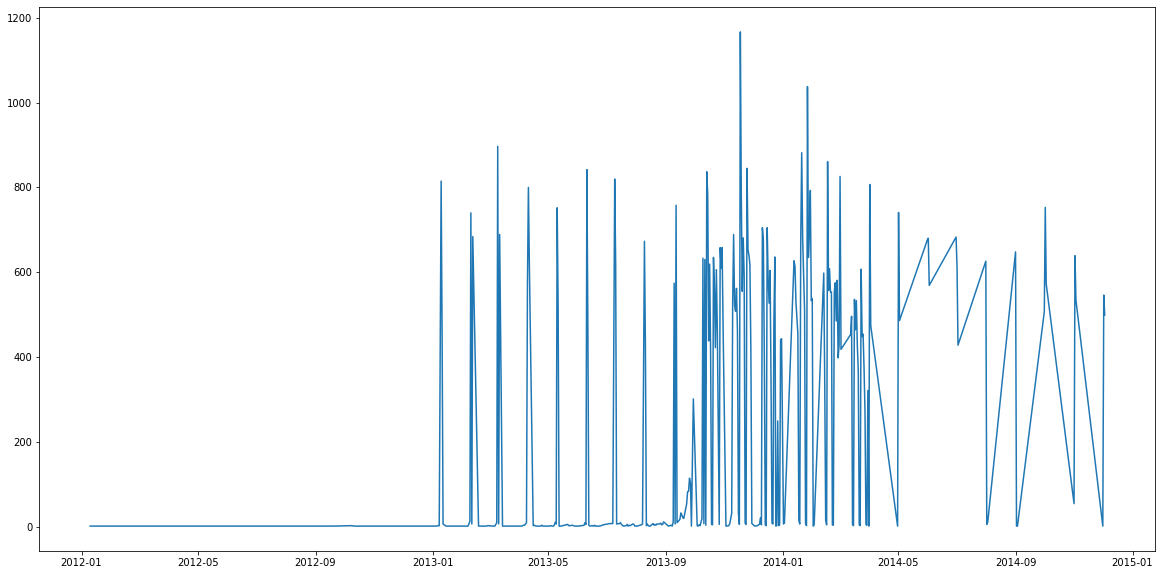

In [116]:
## Plotting the data
plt.figure(figsize=(20,10))
plt.plot(data3)


In [117]:
data3.head()

,No_of_Incidents
Open_Time,
2012-01-10,1
2012-02-10,1
2012-03-09,1
2012-03-29,1
2012-05-02,1


In [118]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 331 entries, 2012-01-10 to 2014-12-03
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   No_of_Incidents  331 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [119]:
# Since not many tickets before jan 2013, we consider only the later values
data3 = data3.loc[data3.index >= ('2013-01-01')]
data3.head()

,No_of_Incidents
Open_Time,
2013-01-03,1
2013-01-05,1
2013-01-07,2
2013-01-08,2
2013-01-10,815


In [120]:
data3.shape

(311, 1)

In [165]:
data3

,No_of_Incidents
Open_Time,
2013-01-03,1
2013-01-05,1
2013-01-07,2
2013-01-08,2
2013-01-10,815
...,...
2014-11-02,639
2014-11-03,534
2014-12-01,1


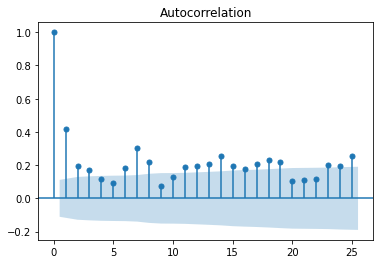

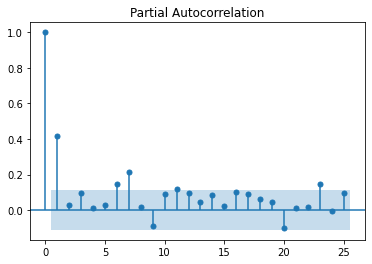

In [121]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#acf is to identify parameter of q,
#pacf is to identify parameter of p,

plot_acf(data3.No_of_Incidents);
plot_pacf(data3.No_of_Incidents);

In [122]:
from statsmodels.tsa.stattools import adfuller

In [123]:
def adfuller_test(data3):
    result=adfuller(data3)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print(" Data has no unit root and is stationary")
    else:
        print(" Data has a unit root, indicating it is non-stationary ")
        
 #If p< 0.05 ; Data is stationary
#if p>0.05; Data is not stationary       

adfuller_test(data3['No_of_Incidents'])

# from plot we can see the series given is stationary

ADF Test Statistic : -2.9771977041167723
p-value : 0.03707941811032975
#Lags Used : 10
Number of Observations Used : 300
 Data has no unit root and is stationary


In [124]:
data3.head()

,No_of_Incidents
Open_Time,
2013-01-03,1
2013-01-05,1
2013-01-07,2
2013-01-08,2
2013-01-10,815


In [125]:
data3.No_of_Incidents.value_counts()

1      60
2      25
3      17
5      16
6      14
       ..
607     1
606     1
604     1
598     1
510     1
Name: No_of_Incidents, Length: 141, dtype: int64

In [126]:
#determing rolling statistics

rolmean = data3.rolling(window=12).mean()

rolstd = data3.rolling(window=12).std()

print(rolmean, rolstd)


            No_of_Incidents
Open_Time                  
2013-01-03              NaN
2013-01-05              NaN
2013-01-07              NaN
2013-01-08              NaN
2013-01-10              NaN
...                     ...
2014-11-02       353.666667
2014-11-03       362.500000
2014-12-01       310.416667
2014-12-02       355.500000
2014-12-03       396.250000

[311 rows x 1 columns]             No_of_Incidents
Open_Time                  
2013-01-03              NaN
2013-01-05              NaN
2013-01-07              NaN
2013-01-08              NaN
2013-01-10              NaN
...                     ...
2014-11-02       309.927949
2014-11-03       313.726430
2014-12-01       317.857160
2014-12-02       308.838734
2014-12-03       290.843640

[311 rows x 1 columns]


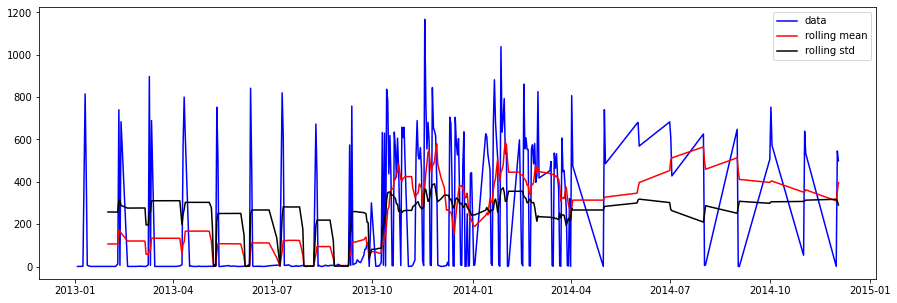

In [127]:
plt.figure(figsize=(15,5))
dt2 = plt.plot(data3, color= 'blue',label='data')
mean = plt.plot(rolmean, color= 'red',label='rolling mean')
std = plt.plot(rolstd, color= 'black',label='rolling std')
plt.legend(loc='best')
plt.show(block=False)

## model

In [128]:
print(data3.shape)


(311, 1)


In [129]:
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA

In [158]:
#Split Your Dataset
train=data3.iloc[:290]
test=data3.iloc[290:]
print(train.shape,test.shape)

(290, 1) (21, 1)


In [159]:
train

,No_of_Incidents
Open_Time,
2013-01-03,1
2013-01-05,1
2013-01-07,2
2013-01-08,2
2013-01-10,815
...,...
2014-04-02,807
2014-04-03,474
2014-05-01,1


In [160]:
test

,No_of_Incidents
Open_Time,
2014-06-01,676
2014-06-02,680
2014-06-03,569
2014-07-01,683
2014-07-02,611
2014-07-03,428
2014-08-01,626
2014-08-02,5
2014-08-03,10


In [161]:
#using auto_arima to get the optimal values of p,q an d
stepwise_fit = auto_arima(train, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4053.627, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4163.863, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4137.088, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4075.327, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4161.872, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4053.900, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4053.685, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4057.581, Time=0.62 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4058.334, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4055.952, Time=1.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4055.235, Time=0.87 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4056.150, Time=1.55 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4051.093, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [166]:
## Geting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)

pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0, 8, 3),
 (0, 8, 4),
 (0, 8, 5),
 (0, 8, 6),
 (0, 8, 7),
 (0, 8, 8),
 (1, 0, 0),
 (1, 0, 1),
 (1,

In [167]:
import warnings
warnings.filterwarnings('ignore')

In [168]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting

pdq = list(itertools.product(p,d,q))
for params in pdq:
    try:
        model_arima = ARIMA(train, order=params)
        model_arima_fit = model_arima.fit()
        print(params, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 4134.859626670834
(0, 0, 1) 4089.1586254052813
(0, 0, 2) 4085.5975428191614
(0, 0, 3) 4085.2919128229014
(0, 0, 4) 4085.799330192289
(0, 0, 5) 4086.730736694844
(0, 0, 6) 4087.916865120744
(0, 0, 7) 4079.518487038251
(0, 0, 8) 4074.6546747760167
(0, 1, 0) 4163.8630093380125
(0, 1, 1) 4075.3759423049655
(0, 1, 2) 4053.2416470333237
(0, 1, 3) 4053.963768317429
(0, 1, 4) 4055.9330156718543
(0, 1, 5) 4057.927062159999
(0, 1, 6) 4054.406619877291
(0, 1, 7) 4050.797795311686
(0, 1, 8) 4050.488612635838
(0, 2, 0) 4427.17377152068
(0, 2, 1) 4158.13367131099
(0, 2, 2) 4075.22339386236
(0, 2, 3) 4052.878425150441
(0, 2, 4) 4054.4310902041657
(0, 2, 5) 4056.278746347898
(0, 2, 6) 4058.039105240015
(0, 2, 8) 4050.1101124972006
(1, 0, 0) 4080.783666294618
(1, 0, 1) 4082.5818441725337
(1, 0, 2) 4067.2222153984667
(1, 0, 3) 4458.552119302789
(1, 1, 0) 4137.097298267236
(1, 1, 1) 4052.540841130845
(1, 1, 2) 4053.959653359759
(1, 1, 3) 4055.9396807205894
(1, 1, 4) 4057.927165863226
(1, 1, 7) 

In [137]:

#(2, 1, 4) 4043.09201570094
#(4, 1, 3) 4044.20750811319

In [170]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(2, 1, 4))

model_arima_fit=model_arima.fit()



In [171]:
## evaluate the model
print(model_arima_fit.aic)

4043.09201570094


## test

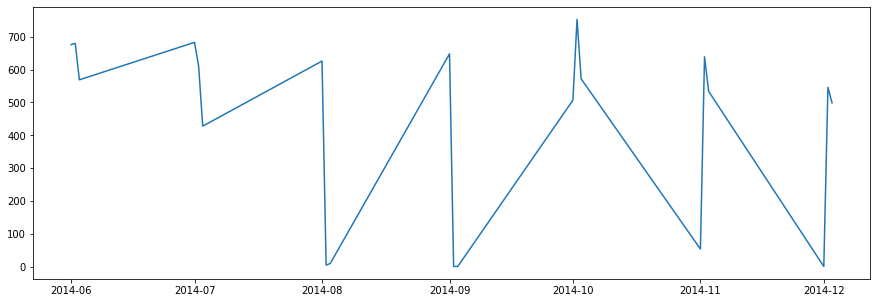

In [172]:
## plotting the test data
plt.figure(figsize=(15,5))
plt.plot(test)


In [173]:
test.index

DatetimeIndex(['2014-06-01', '2014-06-02', '2014-06-03', '2014-07-01',
               '2014-07-02', '2014-07-03', '2014-08-01', '2014-08-02',
               '2014-08-03', '2014-09-01', '2014-09-02', '2014-09-03',
               '2014-10-01', '2014-10-02', '2014-10-03', '2014-11-01',
               '2014-11-02', '2014-11-03', '2014-12-01', '2014-12-02',
               '2014-12-03'],
              dtype='datetime64[ns]', name='Open_Time', freq=None)

In [174]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=20)[0]
predictions

array([422.88519551, 532.33089579, 530.99126727, 427.03925746,
       353.64465072, 394.44779334, 491.63288409, 527.99126595,
       469.31881706, 395.39433439, 395.30233085, 462.98122648,
       514.29306263, 492.97896678, 433.06465194, 409.8230457 ,
       447.99760354, 498.38924951, 502.79488193, 462.55888493])

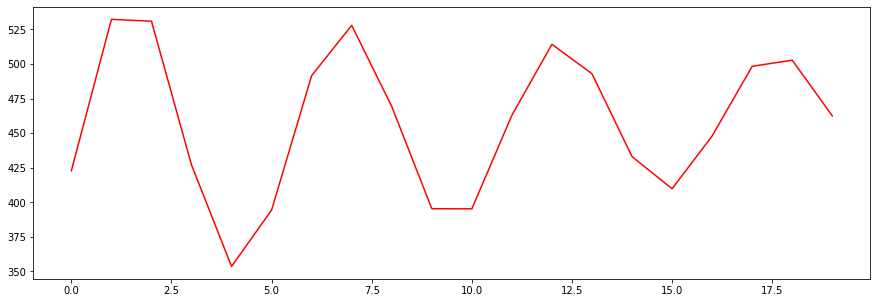

In [175]:
plt.figure(figsize=(15,5))
plt.plot(predictions,color='red')

<AxesSubplot:xlabel='Open_Time'>

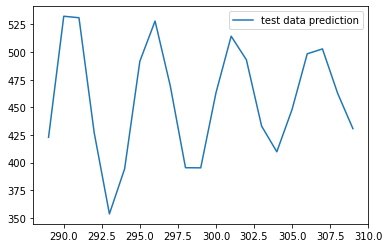

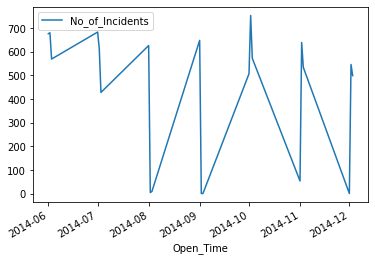

In [176]:
start=len(train)
end=len(train)+len(test)-1
predictions2=model_arima_fit.predict(start=start,end=end,typ='levels')
predictions2.plot(label='test data prediction',legend=True)
test.plot(legend=True)

## future pred

In [179]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)

pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0, 8, 3),
 (0, 8, 4),
 (0, 8, 5),
 (0, 8, 6),
 (0, 8, 7),
 (0, 8, 8),
 (1, 0, 0),
 (1, 0, 1),
 (1,

In [180]:
pdq = list(itertools.product(p,d,q))
for params in pdq:
    try:
        model_arima2 = ARIMA(data3['No_of_Incidents'], order=params)
        model_arima_fit2 = model_arima2.fit()
        print(params, model_arima_fit2.aic)
    except:
        continue

(0, 0, 0) 4439.006382779905
(0, 0, 1) 4390.023013967267
(0, 0, 2) 4387.706606052466
(0, 0, 3) 4385.336750000783
(0, 0, 4) 4385.605648005615
(0, 0, 5) 4386.778270512276
(0, 0, 6) 4388.251868971456
(0, 0, 7) 4381.573077642748
(0, 0, 8) 4372.17437405589
(0, 1, 0) 4472.8835498027365
(0, 1, 1) 4372.325747182852
(0, 1, 2) 4348.983889547076
(0, 1, 3) 4350.550418304985
(0, 1, 4) 4352.215799239944
(0, 1, 5) 4354.215638150254
(0, 1, 6) 4351.590807266207
(0, 1, 7) 4348.952306907114
(0, 1, 8) 4349.385449171154
(0, 2, 0) 4757.908186830309
(0, 2, 1) 4467.202749512424
(0, 2, 2) 4372.417849799613
(0, 2, 3) 4349.440312629789
(0, 2, 4) 4351.379509917026
(0, 2, 5) 4353.368544159435
(0, 2, 6) 4355.172146382782
(0, 2, 8) 4348.640853904668
(1, 0, 0) 4381.914443021002
(1, 0, 1) 4383.421021472255
(1, 0, 2) 5383.27470308193
(1, 1, 0) 4442.908927477834
(1, 1, 1) 4349.357435725783
(1, 1, 2) 4350.467575735412
(1, 1, 3) 4352.848956857112
(1, 1, 4) 4354.460103765383
(1, 1, 7) 4350.457423752485
(1, 2, 0) 4644.738359

In [147]:

#(4, 1, 3) 4340.518446009514


In [181]:
##Model object creation and fitting the model
model_arima2 = ARIMA(data3['No_of_Incidents'], order=(4, 1, 3))

model_arima_fit2=model_arima2.fit()



In [182]:
print(model_arima_fit2.aic)

4340.518446009514


In [183]:
data3.head()

,No_of_Incidents
Open_Time,
2013-01-03,1
2013-01-05,1
2013-01-07,2
2013-01-08,2
2013-01-10,815


In [184]:
data3.tail()

,No_of_Incidents
Open_Time,
2014-11-02,639
2014-11-03,534
2014-12-01,1
2014-12-02,546
2014-12-03,499


In [185]:
# Predicting the future values and the confidence interval
index_future_dates=pd.date_range(start='2014-12-04',end='2015-12-04')
print(index_future_dates)

DatetimeIndex(['2014-12-04', '2014-12-05', '2014-12-06', '2014-12-07',
               '2014-12-08', '2014-12-09', '2014-12-10', '2014-12-11',
               '2014-12-12', '2014-12-13',
               ...
               '2015-11-25', '2015-11-26', '2015-11-27', '2015-11-28',
               '2015-11-29', '2015-11-30', '2015-12-01', '2015-12-02',
               '2015-12-03', '2015-12-04'],
              dtype='datetime64[ns]', length=366, freq='D')


In [186]:

fpredictions=model_arima_fit2.predict(start=len(data3),end=len(data3)+365, typ='levels')
print(fpredictions)

fpredictions.index=index_future_dates

print(fpredictions)

310    462.577153
311    461.635076
312    420.653977
313    380.895928
314    397.225062
          ...    
671    805.402669
672    806.458067
673    807.513465
674    808.568863
675    809.624261
Length: 366, dtype: float64
2014-12-04    462.577153
2014-12-05    461.635076
2014-12-06    420.653977
2014-12-07    380.895928
2014-12-08    397.225062
                 ...    
2015-11-30    805.402669
2015-12-01    806.458067
2015-12-02    807.513465
2015-12-03    808.568863
2015-12-04    809.624261
Freq: D, Length: 366, dtype: float64


In [187]:
fpredictions.index

DatetimeIndex(['2014-12-04', '2014-12-05', '2014-12-06', '2014-12-07',
               '2014-12-08', '2014-12-09', '2014-12-10', '2014-12-11',
               '2014-12-12', '2014-12-13',
               ...
               '2015-11-25', '2015-11-26', '2015-11-27', '2015-11-28',
               '2015-11-29', '2015-11-30', '2015-12-01', '2015-12-02',
               '2015-12-03', '2015-12-04'],
              dtype='datetime64[ns]', length=366, freq='D')

<AxesSubplot:>

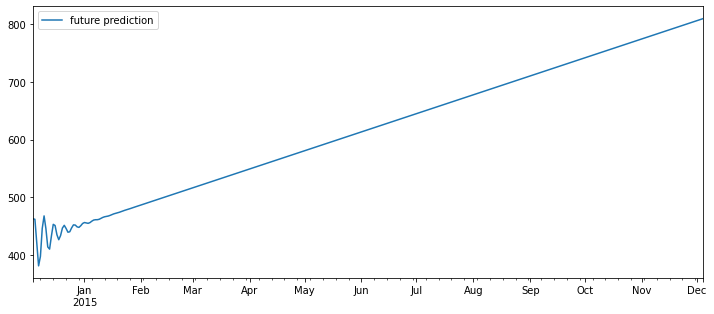

In [188]:
fpredictions.plot(figsize=(12,5),label='future prediction',legend=True)


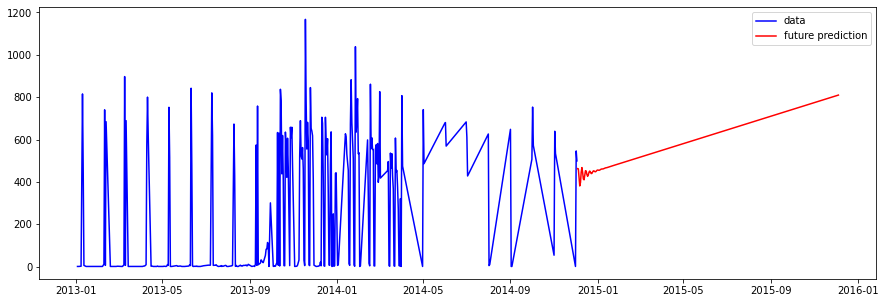

In [189]:
#Forecast the incident volume in annual
plt.figure(figsize=(15,5))
dt2 = plt.plot(data3, color= 'blue',label='data')
fpred = plt.plot(fpredictions, color= 'red',label='future prediction')
plt.legend(loc='best')
plt.show(block=False)

2014-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2015-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: Q-DEC, dtype: object

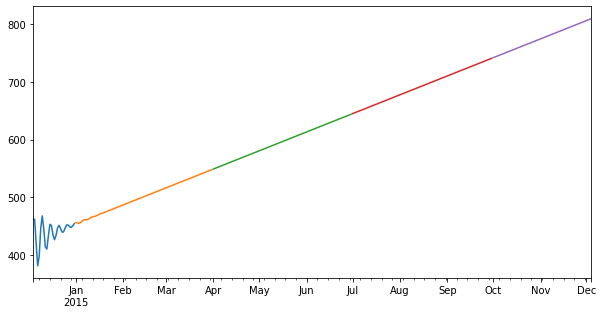

In [190]:
#Forecast the incident volume in quarterly
plt.figure(figsize=(10,5))
fpredictions.resample('Q').plot()

In [191]:
data3.describe()

,No_of_Incidents
count,311.000000
mean,246.459807
std,302.749919
min,1.000000
25%,2.000000
50%,9.000000
75%,537.000000
max,1167.000000


In [193]:
test['No_of_Incidents'].mean()

430.6190476190476

In [194]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(predictions2,test['No_of_Incidents']))
print(rmse)

282.0163812002877


In [200]:
pip install pystan


Note: you may need to restart the kernel to use updated packages.


In [201]:
pip install fbprophet

  Using cached https://files.pythonhosted.org/packages/1a/b5/9c3fefa8a7b839729df57deedf0a69815841dfb88f0df911f34d998230b7/fbprophet-0.7.1.tar.gz
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\DRvirusKT\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\DRVIRU~1\\AppData\\Local\\Temp\\pip-install-qao49vis\\fbprophet\\setup.py'"'"'; __file__='"'"'C:\\Users\\DRVIRU~1\\AppData\\Local\\Temp\\pip-install-qao49vis\\fbprophet\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\DRVIRU~1\AppData\Local\Temp\pip-wheel-398_yu0z' --python-tag cp37
       cwd: C:\Users\DRVIRU~1\AppData\Local\Temp\pip-install-qao49vis\fbprophet\
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f5236004a3fd5b8429270d00efcc0cf9 NOW.
  error: Micros

In [202]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [203]:
from prophet import Prophet

ModuleNotFoundError: No module named 'prophet'